# **Artificial Intelligence Programming Assignment Question 2**
Group Members:
- Darren Abbot ak Manggon, 11811011274
- Tuan Arif Uwais, 1181101025
- Puteri Nurul Izzah, 1181100771

## Description and Prerequisite 

- Tested With Jupyter Lab and Python 3.10
- Created 5 Mazes, reference on how we made it are below
- Used A* Search Algorithm and Iterative Deepening Search Algorithm (IDS)
- Modified the pyamaze module taken from the github repository

#### Installing Needed Packages for Plotting Time Chart

In [ ]:
pip install matplotlib

#### Import needed modules and packages

In [1]:
from pyamaze import maze, agent, COLOR, textLabel
from queue import PriorityQueue
import time, random, matplotlib

#### Declaring Global Variables and Minor Functions

In [2]:
"""
    ListStartCells - a list of start cells
    selectedStart - default to the first item in the ListStartCells
    ListGoalCells_Mazes - a list that contains an inner list of 3 goals for each maze
    currentGoal - default to the first list in the ListGoalCells_Mazes, can be changed later on
    index - defaults at 1 when going through the selectedGoals, used to switch goals when it is being called to be introduced
"""

ListMazeNames = ['maze1.csv', 'maze2.csv', 'maze3.csv', 'maze4.csv', 'maze5.csv']
selectedMaze = ListMazeNames[0]

ListStartCells = [(9,10), (10, 10), (12,3), (14, 10), (5,1)]
selectedStart = ListStartCells[0]

ListGoalCell_Mazes = [[(1,1), (10,1), (1,5)], [(2,2), (6,7), (1,9)], [(5,5), (7,1), (3,4)], [(3,2), (6,7), (12,1)], [(10,9), (1,2), (12,12)],]
selectedGoals = ListGoalCell_Mazes[0]
currentGoal = selectedGoals[0]
index = 1

# changeGoal function to change the goal from the selectedGoals when it is being called to be introduced
def changeGoal(newGoal):
    global currentGoal
    currentGoal = newGoal
    #print("New Goal!: ", currentGoal)
    return


#### Create and Save Mazes - Keep It For References

#### Defining Heuristic Function (Manhattan Distance Function)

In [3]:
def heuristic(cell_1, cell_2):
    x1, y1 = cell_1
    x2, y2 = cell_2
    
    return abs(x1 - x2) + abs(y1 - y2)

#### Generating Neighbouring Maze Location for Iterative Deepening Search Usage

In [4]:
def generateNeighbours(m):
    start=(m.rows, m.cols)
    frontier = [start]
    neighbours = {}
    explored = [start]
    
    #Requires usage of DBS
    while len(frontier) > 0:
        currentCell= frontier.pop()
        
        list_neighbours = []
        for direction in "ESNW":
            if m.maze_map[currentCell][direction]==True:
                if direction == "E":
                    childCell = (currentCell[0], currentCell[1] + 1 )
                    neighbours[currentCell] = childCell
                elif direction == "W":
                    childCell = (currentCell[0], currentCell[1] - 1 )
                elif direction == "S":
                    childCell = (currentCell[0]+1, currentCell[1] )
                elif direction == "N":
                    childCell = (currentCell[0]-1, currentCell[1])
                
                list_neighbours.append(childCell)
                if childCell in explored:
                    continue
                
                explored.append(childCell)
                frontier.append(childCell)
                
                #print("frontier =", frontier)
                #print("explored =", explored)
                #print("Current Cell: ", currentCell)
        
        #print("Neighbours around: ", list_neighbours)
        copyNeighbours = []
        for neighbour in list_neighbours:
            if currentCell in neighbours and type(neighbours.setdefault(currentCell, [])) is list :
                # It finds the value with the currentNode and appends any neighbour that associates with that currentCell
                # print(neighbours.setdefault(currentCell, []))
                # print(type(neighbours.setdefault(currentCell, [])))
                neighbours.setdefault(currentCell, []).append(neighbour)
            else:
                neighbours[currentCell] = [neighbour]
                copyNeighbours.extend(neighbours[currentCell])
        
        
        #print()
    #print("Neighbours: ", neighbours)        
    return neighbours

#### Iterative Deepening Search Algorithm Functions

In [5]:
# Need to fix - Agent Path does not intend to be follow the way it should
idsLastCoordinate = (0,0)
def function_IDSA(maze, start, goal, forwardPath):
    
    # Set initial variables for IDS Functions
    agentPath = forwardPath
    visitedPath = []
    trueGoal = True
    
    # Making sure it inserts the last node and the newly introduced goal
    #print("Start Node: ", start)
    #print("Current Goal: ", goal)
    
    # Make sure depth's not too big that it misses it's turn to introduce a new goal
    changeIndex = random.randint(2,9)
    # Set limit for the range in case the size of our maze goes bigger
    start_timeB = time.perf_counter()
    for depth in range(100):
        
        if changeIndex == depth and index < 3:
            changeGoal(selectedGoals[index])
            
        steps = recursiveIDS(maze, start, goal, depth, visitedPath, agentPath)

        """
        If steps does not return false, confirmed to be the goal cell as it can be traced from the starting node itself
        the step will return the starting node , for instance the 3rd starting node that was from the 2nd last coordinated being search
        when the 3rd goal was introduced. Similar to the requirements needed.
        """
        if steps is not False and index == 3:
            #print(depth + 1, " Steps")
            #print("Boolean of Steps?: ", steps)
            #print("Agent Paths: ", agentPath)
            trueGoal = True
            break
        
        # Check if all of these conditions are met to return it    
        elif steps is not False and steps != currentGoal and index < 3:
            trueGoal = False
            #print("Returned Coordinated: ", list(agentPath.values())[0])
            print("Real Last Coordinate: ", idsLastCoordinate)
            lastCoordinate = idsLastCoordinate
            #print("Returned Paths: ", visitedPath)
            break
        #Else, empty the vistied path for the next depth
        else:
            #print(visitedPath)
            visitedPath = []
    end_timeB = time.perf_counter() 
        #return the fwdPath and the search Path of how it works
    
    totalTime = end_timeB - start_timeB
    
    if trueGoal is False:
        #print(visitedPath)
        return agentPath, lastCoordinate, visitedPath,  totalTime, trueGoal
    else:
        return agentPath, depth, visitedPath, totalTime, trueGoal

# Recursive Function
def recursiveIDS(maze, currentCell, goal, depth, visitedPath, agentPath):
    visitedPath.append(currentCell)
    #print(currentCell)
    if currentCell == goal:
        #print(depth)
        #print("We have found the goal!")
        #print("Visited Paths!", visitedPath)
        return currentCell
    
    # Check if a new goal has been introduced
    # If yes and the depth has been searched up for the visited Paths, return 
    elif currentGoal != goal and depth == 0:
        #print("What should be returned: ", currentCell)
        global idsLastCoordinate
        idsLastCoordinate = currentCell
        return currentCell
    
    elif depth == 0:
        #print("Goal not founded yet")
        return False
    
    else:
        #Why False is because it still has some depth level/threshold to look into
        cell = False
        #print(currentCell)
        
        #For each neighbour that it explores, it will return the path that will be used for the agent to move into
        for neighbour in maze[currentCell]:
            if neighbour not in visitedPath and cell is False:
                cell = recursiveIDS(maze, neighbour, goal, depth-1, visitedPath, agentPath)
                #print(cell)
                #print("Boolean: ", cell)
        
        #While only activate either the goal has changed or the cell has found the true goal itself
        if cell is not False or currentGoal != goal:
            #print ("cellue: " + str(cell) + ":" + str(currentCell))
            #print(depth)
            #print(cell)
            agentPath[currentCell] = cell
            #print(agentPath)
            return currentCell        
        
        return False
    
        


#### Defining the A* Search Function:

In [6]:
def aStarSearch(m, start, goal, changeIndex, forwardPath):
    gScore = {cell: float('inf') for cell in m.grid}
    
    #Initialize distance of startCell from destination Cell n
    gScore[start] = 0
    trueGoal = True
    lastCoordinate = None
    countIndex = 0
    
    #Total Cost to reach the goal cell combining both GScore and H Score Function
    fScore = {cell: float('inf') for cell in m.grid}
    fScore[start] = heuristic(start, goal) # Chabge the second parameter to the goal variable
    
    open = PriorityQueue()
    
    open.put((heuristic(start, goal), heuristic(start, goal), start))
    
    aPath = {} # aStar Algorithm compatible path
    searchPath = [] # Used to find spaces that have been explored
    
    #print("Starting Queue: ", open.queue)
    
    #Loop Sequence
    while not open.empty():
        currentCell = open.get()[2] #Getting coordinates in 2nd parameter
        searchPath.append(currentCell)
        
        if currentCell == goal:
            break
        for direction in "ESNW":
            #print("Direction: ", direction)
            if m.maze_map[currentCell][direction] == True:
                if direction == "E":
                    childCell = (currentCell[0], currentCell[1] + 1 )         
                if direction =="W":
                    childCell = (currentCell[0], currentCell[1] - 1 )
                if direction == "N":
                    childCell = (currentCell[0]-1, currentCell[1] )
                if direction == "S":
                    childCell = (currentCell[0]+1, currentCell[1] )
                    
                temp_gScore = gScore[currentCell] + 1
                temp_fScore = temp_gScore + heuristic(childCell, goal)
                
                if temp_fScore < fScore[childCell]:
                    #print("Founded a path: ", childCell)
                    gScore[childCell] = temp_gScore
                    fScore[childCell] = temp_fScore
                    open.put((temp_fScore, heuristic(childCell, goal), childCell))
                    aPath[childCell] = currentCell
                    
                #print("Goal That was passed: ", goal)
                #print("Current Goal: ", currentGoal)
                #Check if the goal from global is changed suddenly
                if changeIndex == countIndex and index != 3:
                    #print("Old Goal: ", goal)
                    #print("New Goal: ", selectedGoals[index])
                    changeGoal(selectedGoals[index])
                    
                    trueGoal = False
                    lastCoordinate = currentCell
                    break
                        
        if trueGoal == False:
            break
        countIndex += 1
        
    if trueGoal == False:
        #print("Goal has changed, time to change")
        cell = lastCoordinate #Get the last coordinate that it was started from

        while cell != start:
            forwardPath[ aPath[cell] ] = cell
            cell = aPath[cell]
            
        return lastCoordinate, aPath, searchPath, trueGoal, forwardPath
    else:
        #Start initialize path for agent to move
        cell = goal #Replace with goal variable

        while cell != start:
            forwardPath[ aPath[cell] ] = cell
            cell = aPath[cell]

        return forwardPath, aPath, searchPath, trueGoal    
            
           
    

#### Main Part of the Program - Change the maze to test using the variable `selectedMazeToTest`

In [7]:
"""
    You can switch which maze would you like to track from ranging 0 to 4 (maze 1 to 5)
    maze1 - 0, maze2 - 1, maze3 - 2, maze4 - 3, maze5 - 4
    SCRAPPED
"""
# Declare 
listTimeElapsed_AStar = []
listTimeElapsed_IDS = []


for mazeCounter in range(5):
    print()
    print("Maze: ", mazeCounter + 1)
    selectedMaze = ListMazeNames[mazeCounter]
    selectedStart = ListStartCells[mazeCounter]
    selectedGoals = ListGoalCell_Mazes[mazeCounter]
    currentGoal = selectedGoals[0] #Need to reset to new list of goals selected

    #Creating a random time index on when the goal will be changing  
    changeIntIndex = random.randint(0, 20)

    #Initialize Maze Object, Goal, CreateMaze() function
    m = maze()
    m.CreateMaze(currentGoal[0], currentGoal[1], loadMaze =selectedMaze)

    # Generating neighbouring cells of the maze for IDS Path Finding Algorithm - Should we count it together within IDS Algorithm Function?
    mazeNeighbours = generateNeighbours(m)

    #Initialize Lists to store A* Paths and Time Taken, do the same for IDS Paths - of each goal
    listAStarPaths = []
    listAStarTime = []
    forwardPathAStar = {}

    listIDSPaths = []
    listIDSTime = []
    forwardPathIDS = {}
    print("==========================================================")
    print("Starting A* Search Path Finding Algorithm")
    while True:
        print()
        print("Current Maze Selected: ", selectedMaze)
        print("Current Starting Cell: ", selectedStart)
        print("Current Goal Selected: ", currentGoal)

        #Used when the Maze Object is destroyed to accomodate the newly introduced goals
        if 'm' not in globals():
            m = maze()
            m.CreateMaze(currentGoal[0], currentGoal[1], loadMaze = selectedMaze)
            #print("Maze is re-created")

        # Record time taken of Path Finding Algorithm
        start_timeA = time.perf_counter()
        pathAStar = aStarSearch(m , selectedStart, currentGoal, changeIntIndex, forwardPathAStar)
        end_timeA = time.perf_counter()

        # Checks whether it has found the real goals once it goes through 3 iterations of goal nodes
        if pathAStar[3] == True:
            print("The A* Search Function Returns and founds the true goal: ", currentGoal)
            listAStarPaths.append(pathAStar)
            listAStarTime.append(end_timeA - start_timeA) 
            break
        else:
            # print("Nope, the goal changed, time to store")
            # Delete and destroy the maze object, append the previous searched coordinate to be used as start node
            # and del reference to m and pathAStar and add index by 1 for the 2nd and 3rd introduced goal
            print("The Goal Changes, time to change")
            #print("A* Search Path: ", listAStarPaths[index-1][2])
            m.__del__()
            selectedStart = pathAStar[0]
            forwardPathAStar = pathAStar[4]
            listAStarPaths.append(pathAStar)
            listAStarTime.append(end_timeA - start_timeA)

            changeIntIndex = random.randint(0, 10)
            del m, pathAStar
            index += 1
    print("==========================================================")
    
    listTimeElapsed_AStar.append(sum(listAStarTime))

    # Reset and initialize the currentGoal, Index and changeIntIndex for IDS Path Finding Algorithm
    index = 1
    selectedStart = ListStartCells[mazeCounter]
    currentGoal = selectedGoals[0]
    changeIntIndex = random.randint(0, 20)

    #While True Loop for IDS Algorithm
    print("==========================================================")
    print("Starting Iterative Deepening Search Path Finding Algorithm")
    while True:
        print()
        print("Current Maze Selected: ", selectedMaze)
        print("Current Starting Cell: ", selectedStart)
        print("Current Goal Selected: ", currentGoal)

        pathIDSA = function_IDSA(mazeNeighbours, selectedStart, currentGoal, forwardPathIDS)

        #Checks if the true Goal has been found
        if pathIDSA[4] is True:

            print("Iterative Search Function has returned, True Goal has been found")
            listIDSPaths.append(pathIDSA)
            forwardPathIDS = pathIDSA[0]
            listIDSTime.append(pathIDSA[3])
            break
        else:
            """
                Reset the current Goal to the newly introduced goal and current start node to the previous stopped coordinate of pathIDSA
                Also removes the previous references to the pathIDSA, replacing it with a new pathIDSA in the next loop
                Let the garbage collection automatically get the previously hold object
            """
            print("Iterative Search Function has returned, Goal Changed")
            selectedStart = pathIDSA[1] #Getting LastCoordinate from function
            forwardPathIDS = pathIDSA[0]
            listIDSPaths.append(pathIDSA)
            listIDSTime.append(pathIDSA[3])
            del pathIDSA
            index += 1
    print("==========================================================")
    
    
    listTimeElapsed_IDS.append(sum(listIDSTime))

    """ Finally creating the path searching agents and forward path agents for each algorithm """
    # Creating Forward Agents for the A* Path Finding Algorithm 
    agentA = agent(m, ListStartCells[mazeCounter][0], ListStartCells[mazeCounter][1], shape = "arrow",footprints = True)

    # Creating Search Path Agents to represent each iteration of the A* Path Finding Algorithm
    agentAStarPath_1 = agent(m, ListStartCells[mazeCounter][0], ListStartCells[mazeCounter][1], footprints = True, color=COLOR.yellow, filled = True)
    agentAStarPath_2 = agent(m, listAStarPaths[0][0][0], listAStarPaths[0][0][1], footprints = True, color=COLOR.red, filled = True)
    agentAStarPath_3 = agent(m, listAStarPaths[1][0][0], listAStarPaths[1][0][1], footprints = True, color=COLOR.cyan, filled = True)

    # Trace each forward agent paths from each of the star A Paths
    m.tracePath({agentAStarPath_1: listAStarPaths[0][2]}, showMarked = True, delay = 1)
    m.tracePath({agentAStarPath_2: listAStarPaths[1][2]}, showMarked = True, delay = 1)
    m.tracePath({agentAStarPath_3: listAStarPaths[2][2]}, showMarked = True, delay = 1)

    m.tracePath({agentA: listAStarPaths[2][0]})

    #Please put all prints here!
    print()

    print("Steps taken for A Star Search Agent: ", len(pathAStar[0]) + 1, " steps." )
    print("Time taken for A Star Search Agent: ", sum(listAStarTime), " seconds.")


    # Creating Forward agent for IDS Path Finding Algorithm
    agentB_1 = agent(m, ListStartCells[mazeCounter][0], ListStartCells[mazeCounter][1], shape = "arrow", footprints = True, color = COLOR.light)


    # Creating Search agents to represent each iteration of the IDS Path Finding Algorithm
    agentB_IDSPath_1 = agent(m, ListStartCells[mazeCounter][0], ListStartCells[mazeCounter][1], footprints = True, color=COLOR.yellow, filled = True)
    agentB_IDSPath_2 = agent(m, listIDSPaths[0][1][0], listIDSPaths[0][1][1], footprints = True, color=COLOR.red, filled = True)
    agentB_IDSPath_3 = agent(m, listIDSPaths[1][1][0], listIDSPaths[1][1][1], footprints = True, color=COLOR.cyan, filled = True)


    m.tracePath({agentB_IDSPath_1: listIDSPaths[0][2]}, showMarked = True, delay = 1)
    m.tracePath({agentB_IDSPath_2: listIDSPaths[1][2]}, showMarked = True, delay = 1)
    m.tracePath({agentB_IDSPath_3: listIDSPaths[2][2]}, showMarked = True, delay = 1)

    #print(listIDSPaths[2][2])

    #print(listIDSPaths[0][0])
    #print(listIDSPaths[1][0])
    print(listIDSPaths[2][0])

    m.tracePath({agentB_1: listIDSPaths[2][0]})

    print("Steps taken for Iterative Deepening Search for agent B: ", pathIDSA[1], " steps.")
    print("Time taken for Iterative Deepening Search A to finish: ", sum(listIDSTime), " seconds.")


    m.run()
    
    
    m.__del__()
    
    index = 1
    #Get rid of all references first
    del m, listAStarPaths, listAStarTime, forwardPathAStar, listIDSPaths, listIDSTime, forwardPathIDS, changeIntIndex
    time.sleep(5)
print("It functions! YAY")


Maze:  1
Starting A* Search Path Finding Algorithm

Current Maze Selected:  maze1.csv
Current Starting Cell:  (9, 10)
Current Goal Selected:  (1, 1)
The Goal Changes, time to change
Maze Object is Deleted

Current Maze Selected:  maze1.csv
Current Starting Cell:  (7, 6)
Current Goal Selected:  (10, 1)
The Goal Changes, time to change
Maze Object is Deleted

Current Maze Selected:  maze1.csv
Current Starting Cell:  (8, 7)
Current Goal Selected:  (1, 5)
Maze Object is Deleted
Maze Object is Deleted
The A* Search Function Returns and founds the true goal:  (1, 5)
Starting Iterative Deepening Search Path Finding Algorithm

Current Maze Selected:  maze1.csv
Current Starting Cell:  (9, 10)
Current Goal Selected:  (1, 1)
Real Last Coordinate:  (10, 9)
Iterative Search Function has returned, Goal Changed

Current Maze Selected:  maze1.csv
Current Starting Cell:  (10, 9)
Current Goal Selected:  (10, 1)
Real Last Coordinate:  (8, 10)
Iterative Search Function has returned, Goal Changed

Current

#### Time Chart Comparison

Maze Object is Deleted


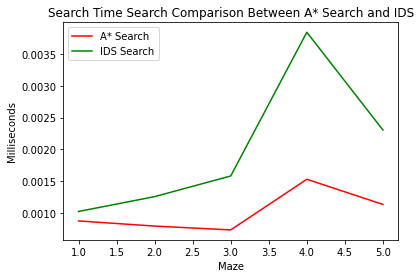

In [9]:
import matplotlib.pyplot as plt

# Using Numpy to create an array X
x1 = [1,2,3,4,5]
y1 = listTimeElapsed_AStar
x2 = [1,2,3,4,5]
y2 = listTimeElapsed_IDS

# Plotting both the curves simultaneously
plt.plot(x1, y1, color='r', label='A* Search')
plt.plot(x2, y2, color='g', label='IDS Search')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Maze")
plt.ylabel("Milliseconds")
plt.title("Search Time Search Comparison Between A* Search and IDS")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()